In [10]:
import torch
from EIE_module import Module
from alexnet import alexnet
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
net = alexnet(pretrained=True)
print(type(net))
seq = None
for name, c in net.named_param_list():
    print(name, c.nelement())
    data = c.view(-1)
    if seq is None:
        seq = data
    else:
        seq = torch.cat((seq, data), 0)

<class 'alexnet.AlexNet'>
features.0.weight 23232
features.0.bias 64
features.3.weight 307200
features.3.bias 192
features.6.weight 663552
features.6.bias 384
features.8.weight 884736
features.8.bias 256
features.10.weight 589824
features.10.bias 256
classifier.1.weight 37748736
classifier.1.bias 4096
classifier.4.weight 16777216
classifier.4.bias 4096
classifier.6.weight 4096000
classifier.6.bias 1000


In [42]:
seq = None
net = torch.nn.Linear(20, 10)
for name, c in net.named_param_list():
    print(name, c.nelement())
    data = c.view(-1)
    if seq is None:
        seq = data
    else:
        seq = torch.cat((seq, data), 0)

weight 200
bias 10


In [43]:
data = seq.numpy().reshape(-1, 1)

In [44]:
data.shape

(210, 1)

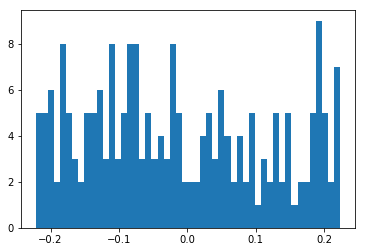

In [45]:
plt.hist(data, bins=50);

In [48]:
kmean = KMeans(n_clusters=8, random_state=0).fit(data)
kmean.labels_

array([6, 1, 1, 3, 0, 0, 7, 4, 1, 3, 4, 1, 3, 7, 6, 5, 0, 1, 0, 4, 1, 1, 7,
       7, 6, 5, 4, 0, 3, 1, 7, 1, 6, 3, 3, 1, 0, 4, 3, 1, 3, 4, 2, 1, 7, 0,
       4, 0, 4, 1, 0, 4, 4, 7, 6, 2, 5, 1, 5, 6, 1, 5, 5, 3, 5, 3, 7, 6, 0,
       3, 5, 4, 1, 5, 7, 4, 0, 6, 5, 5, 6, 3, 6, 1, 3, 1, 6, 3, 3, 2, 1, 1,
       4, 3, 6, 5, 6, 3, 6, 6, 5, 1, 0, 0, 2, 4, 3, 6, 6, 3, 3, 6, 0, 2, 0,
       7, 5, 6, 7, 3, 0, 2, 2, 5, 1, 1, 5, 4, 2, 2, 2, 3, 5, 6, 5, 2, 3, 5,
       4, 5, 4, 6, 1, 1, 3, 2, 6, 4, 5, 7, 4, 3, 6, 1, 5, 4, 1, 3, 4, 6, 3,
       6, 6, 5, 3, 3, 6, 1, 2, 5, 2, 2, 5, 7, 1, 1, 1, 7, 2, 4, 4, 0, 4, 7,
       0, 6, 1, 0, 5, 4, 2, 5, 5, 3, 0, 7, 1, 6, 3, 0, 5, 2, 1, 5, 0, 5, 3,
       0, 4, 7], dtype=int32)

In [49]:
torch.ByteTensor

torch.ByteTensor